In [2]:
import pandas as pd
import numpy as np #import necessary 

In [3]:
df = pd.read_csv('train_agriculture.csv') #importing data

In [4]:
df                 #data

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [5]:
df.shape     #data.shape

(4599, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [7]:
df.isnull().values.any()   #cheacking null values

True

In [8]:
df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt     #importing libary for visualization

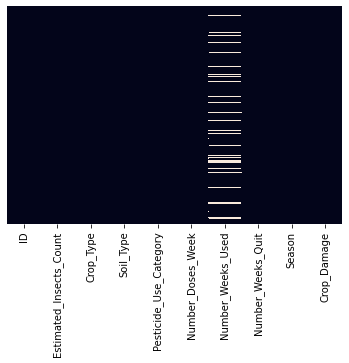

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [11]:
df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mean(),inplace=True)  #teating null value

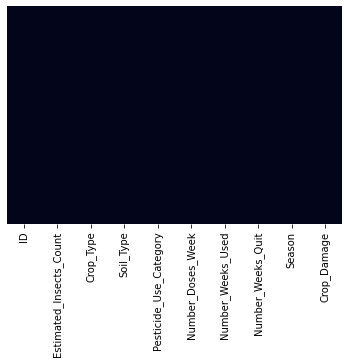

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [13]:
df.median()

Estimated_Insects_Count    1212.000000
Crop_Type                     0.000000
Soil_Type                     0.000000
Pesticide_Use_Category        2.000000
Number_Doses_Week            20.000000
Number_Weeks_Used            28.891027
Number_Weeks_Quit             7.000000
Season                        2.000000
Crop_Damage                   0.000000
dtype: float64

In [14]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [ ]:
1.In Season and Crop Damage Median is greater than mean therfore they left skewed hence in other feature mean is greater than 
median therefore they are right skewed

2.Difference between 75% and max is greater in Crop Damage,Number_Weeks_Quit,Number_Doses_Week and Estimated_Insects_Count

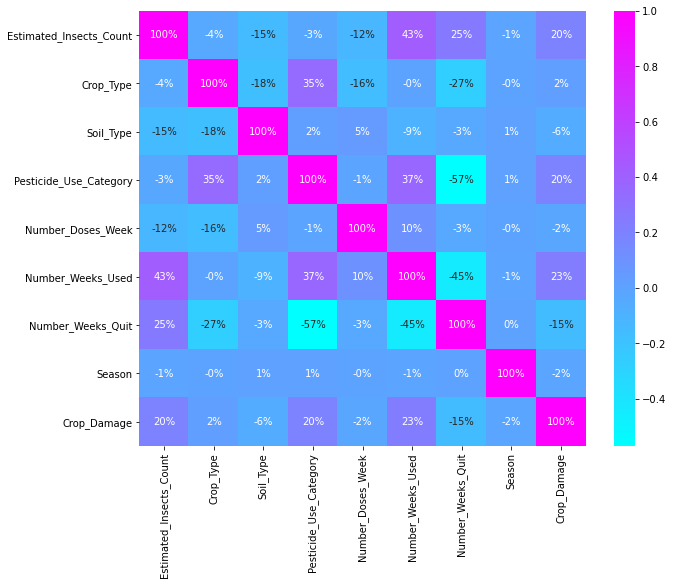

In [15]:
corr = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr,annot=True,fmt = '.0%' ,cmap='cool')       #correlation
plt.show()

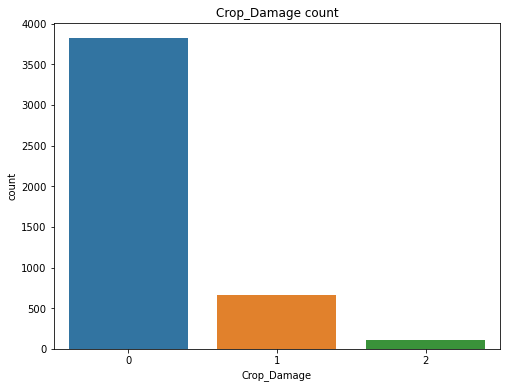

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64


In [16]:
plt.subplots(figsize = (8,6))
sns.countplot(x='Crop_Damage',data=df)       #count of target variable
plt.title('Crop_Damage count')
plt.show()


print(df['Crop_Damage'].value_counts())

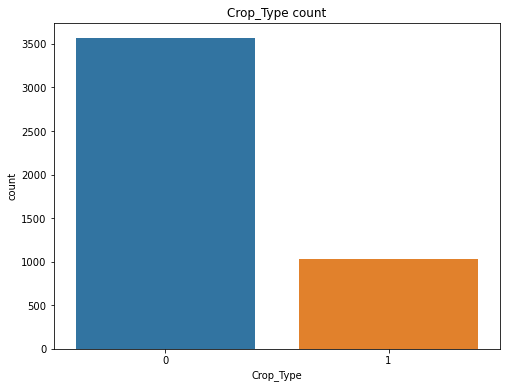

0    3565
1    1034
Name: Crop_Type, dtype: int64


In [17]:
plt.subplots(figsize = (8,6))
sns.countplot(x='Crop_Type',data=df)       #count of crop type
plt.title('Crop_Type count')
plt.show()


print(df['Crop_Type'].value_counts())

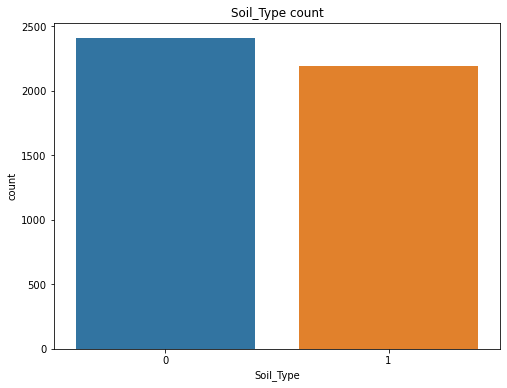

0    2407
1    2192
Name: Soil_Type, dtype: int64


In [18]:
plt.subplots(figsize = (8,6))
sns.countplot(x='Soil_Type',data=df)       #count of soil type
plt.title('Soil_Type count')
plt.show()


print(df['Soil_Type'].value_counts())

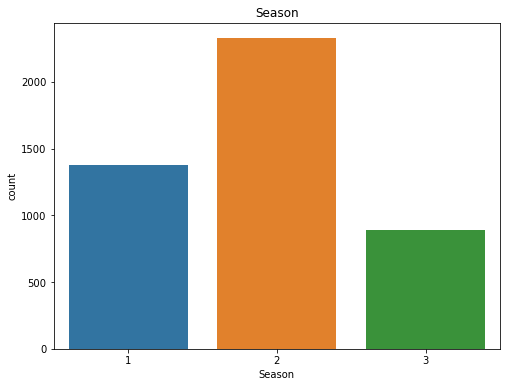

2    2327
1    1379
3     893
Name: Season, dtype: int64


In [19]:
plt.subplots(figsize = (8,6))
sns.countplot(x='Season',data=df)       #count of season
plt.title('Season')
plt.show()


print(df['Season'].value_counts())

Text(0.5, 1.0, 'correlation with target variable')

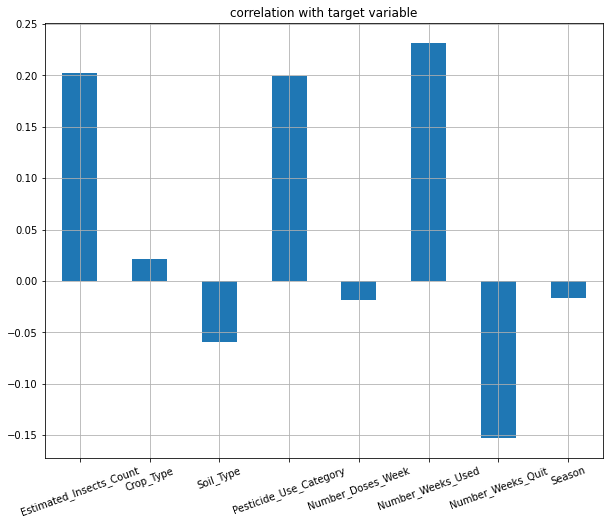

In [20]:
plt.figure(figsize=(10,8))
df.drop('Crop_Damage',axis=1).corrwith(df['Crop_Damage']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)                                 #correlation with target variable
plt.title('correlation with target variable')

In [22]:
df.skew() #cheaking skewness

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [23]:
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.sqrt(df[col])
            
        if df[col].skew()<-0.55:                       #treting skewness
            df[col]=np.cbrt(df[col])

In [24]:
df.skew()

Estimated_Insects_Count    0.257248
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.494443
Number_Doses_Week         -0.002742
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.054299
Season                     0.144841
Crop_Damage                1.868685
dtype: float64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   float64
 2   Crop_Type                4599 non-null   float64
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   float64
 5   Number_Doses_Week        4599 non-null   float64
 6   Number_Weeks_Used        4599 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   float64
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 359.4+ KB


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
df['ID'] = le.fit_transform(df['ID'])                     #converting object to integer

In [29]:
df['ID']

0          0
1          1
2          2
3          3
4          4
        ... 
4594    4594
4595    4595
4596    4596
4597    4597
4598    4598
Name: ID, Length: 4599, dtype: int32

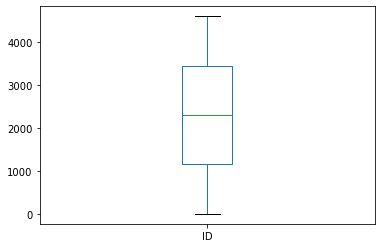

In [30]:
df['ID'].plot.box()                          #cheaking outliers

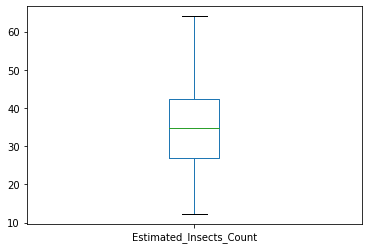

In [31]:
df['Estimated_Insects_Count'].plot.box()

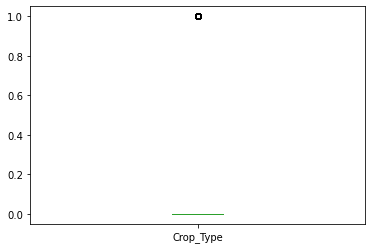

In [32]:
df['Crop_Type'].plot.box()

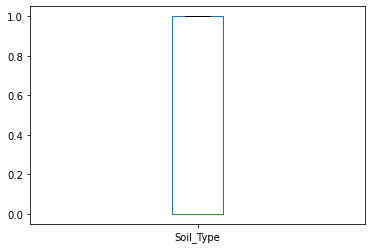

In [33]:
df['Soil_Type'].plot.box()

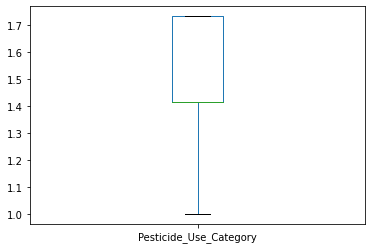

In [34]:
df['Pesticide_Use_Category'].plot.box()

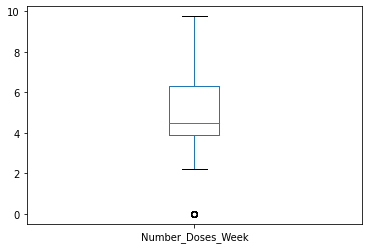

In [35]:
df['Number_Doses_Week'].plot.box()

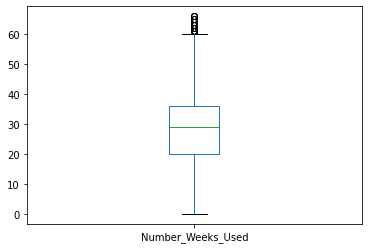

In [36]:
df['Number_Weeks_Used'].plot.box()

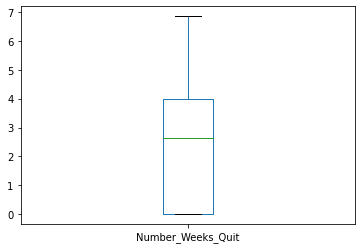

In [38]:
df['Number_Weeks_Quit'].plot.box()

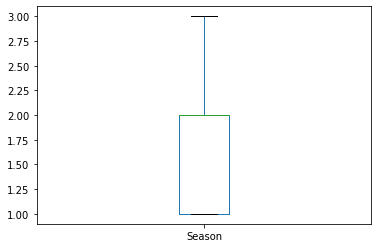

In [39]:
df['Season'].plot.box()

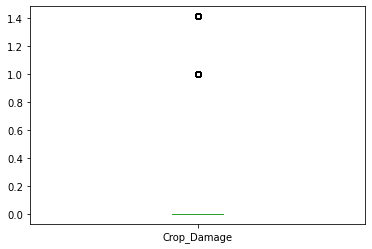

In [40]:
df['Crop_Damage'].plot.box()

In [41]:
from scipy.stats import zscore
z = np.abs(zscore(df))                         #treaating outlier
z

array([[1.73167423, 1.97255279, 1.85681868, ..., 1.21243919, 1.28702725,
        0.44645909],
       [1.730921  , 1.90432337, 1.85681868, ..., 1.21243919, 0.15207762,
        2.03742611],
       [1.73016778, 1.76023723, 1.85681868, ..., 1.21243919, 0.15207762,
        2.03742611],
       ...,
       [1.73016778, 1.13009366, 0.53855555, ..., 1.47914473, 0.15207762,
        0.44645909],
       [1.730921  , 1.13009366, 0.53855555, ..., 1.32521046, 0.15207762,
        0.44645909],
       [1.73167423, 1.13009366, 0.53855555, ..., 0.92331125, 0.15207762,
        0.44645909]])

In [42]:
threshold = 3

In [45]:
print(np.where(z>3))

(array([   0,    0,    1,    1,    2,    2,    3,    3,    4,    4,    5,
          5,    6,    6,    7,    7,    7,    8,    8,    9,    9,    9,
         10,   10,   11,   11,   12,   12,   13,   13,   14,   14,   14,
         15,   15,   16,   16,   17,   17,   18,   18,   19,   19,   20,
         20,   21,   21,   22,   22,   23,   23,  103,  112,  149,  165,
        166,  167,  179,  186,  197,  207,  222,  223,  242,  248,  264,
        265,  290,  296,  305,  316,  351,  355,  361,  374,  375,  377,
        453,  458,  466,  480,  510,  517,  522,  557,  595,  612,  634,
        693,  819,  944,  980, 1067, 1178, 1327, 1339, 1340, 1737, 1807,
       2043, 2139, 2170, 2171, 2237, 2571, 2571, 2572, 2572, 2573, 2573,
       2574, 2574, 2575, 2575, 2576, 2576, 2577, 2577, 2578, 2578, 2579,
       2579, 2580, 2580, 2581, 2581, 2582, 2582, 2583, 2583, 2584, 2584,
       2585, 2585, 2585, 2586, 2586, 2587, 2587, 2588, 2588, 2589, 2589,
       2590, 2590, 2590, 2591, 2591, 2663, 2671, 2

In [46]:
new_df = df[(z<3).all(axis=1)]

In [48]:
print(df.shape,'\t\t',new_df.shape)

(4599, 10) 		 (4437, 10)


In [49]:
df = new_df

In [50]:
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
24,24,12.247449,0.0,0,1.732051,5.477226,26.000000,0.000000,2,0.0
25,25,12.288206,0.0,0,1.732051,6.324555,20.000000,0.000000,1,0.0
26,26,12.247449,0.0,0,1.732051,7.745967,15.000000,0.000000,2,0.0
27,27,12.961481,0.0,1,1.732051,4.472136,14.000000,0.000000,2,0.0
28,28,12.961481,0.0,1,1.732051,4.472136,15.000000,0.000000,2,1.0
...,...,...,...,...,...,...,...,...,...,...
4594,4594,46.238512,0.0,1,1.414214,4.472136,28.891027,1.000000,1,1.0
4595,4595,46.249324,0.0,1,1.414214,5.477226,47.000000,1.414214,1,1.0
4596,4596,47.613023,0.0,1,1.414214,3.162278,7.000000,5.196152,2,0.0
4597,4597,47.613023,0.0,1,1.414214,3.162278,20.000000,4.898979,2,0.0


In [51]:
#splitting the data 
x = df.drop(columns=['Crop_Damage'],axis=1)

In [52]:
y = df['Crop_Damage']

In [53]:
print(x.shape,'\t\t',y.shape)

(4437, 9) 		 (4437,)


In [56]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)         #scaling the data

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.20,random_state=42,stratify=y)    

In [59]:
print(x_train.shape,'\t\t',x_test.shape)

(3549, 9) 		 (888, 9)


In [60]:
print(y_train.shape,'\t\t',y_test.shape)

(3549,) 		 (888,)


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier       #importing necessary algorithms
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report   
from sklearn.model_selection import GridSearchCV,cross_val_score

In [72]:
lg = LogisticRegression()
print(lg.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [78]:
parameters={'C':[1,10],'random_state':range(42,100)}

clf= GridSearchCV(lg,parameters)     #finding best parameter


In [79]:
clf.fit(x,y)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 10], 'random_state': range(42, 100)})

In [80]:
print(clf.best_params_)

{'C': 1, 'random_state': 42}


In [82]:
parameters = {'n_neighbors':range(22,25)}
knn=KNeighborsClassifier()

clf=GridSearchCV(knn,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_neighbors': 24}


In [83]:
lr = LogisticRegression(random_state = 42)
knn = KNeighborsClassifier(n_neighbors = 24)
SVC = SVC()


In [86]:
#creating loops
model = [lr,knn,GaussianNB(),SVC,DecisionTreeClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy score of ',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('-----------------------------------------------------------------------------------------------------------')
    print('\n')

accuracy score of  LogisticRegression(random_state=42) is:
0.8524774774774775
[[750  12]
 [119   7]]
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       762
         1.0       0.37      0.06      0.10       126

    accuracy                           0.85       888
   macro avg       0.62      0.52      0.51       888
weighted avg       0.79      0.85      0.80       888

-----------------------------------------------------------------------------------------------------------


accuracy score of  KNeighborsClassifier(n_neighbors=24) is:
0.8502252252252253
[[752  10]
 [123   3]]
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       762
         1.0       0.23      0.02      0.04       126

    accuracy                           0.85       888
   macro avg       0.55      0.51      0.48       888
weighted avg       0.77      0.85      0.79       888

---------------------------------

In [87]:
#cross validation of models 

model = [lr,knn,GaussianNB(),SVC,DecisionTreeClassifier()]

for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='accuracy')
    print('Model',m)
    print(('score'),score)
    print(('Mean Score',score.mean()))
    print(('Standard deviation'),score.std())
    print('-----------------------------------------------------------------------------------------------------------')
    print('\n')

Model LogisticRegression(random_state=42)
score [0.73423423 0.86936937 0.85585586 0.85810811 0.85810811 0.85810811
 0.72072072 0.86004515 0.86455982 0.85778781]
('Mean Score', 0.8336897281028207)
Standard deviation 0.05332431523632914
-----------------------------------------------------------------------------------------------------------


Model KNeighborsClassifier(n_neighbors=24)
score [0.50900901 0.75900901 0.62612613 0.85810811 0.8490991  0.84459459
 0.43243243 0.84424379 0.8510158  0.85778781]
('Mean Score', 0.7431425782441583)
Standard deviation 0.15331076369255928
-----------------------------------------------------------------------------------------------------------


Model GaussianNB()
score [0.31981982 0.80855856 0.86261261 0.85810811 0.85810811 0.83558559
 0.49324324 0.86681716 0.86230248 0.86230248]
('Mean Score', 0.7627458157932198)
Standard deviation 0.18303953902953313
-------------------------------------------------------------------------------------------------

In [90]:
#ensemble technique to boostup score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [91]:
#creating loop

model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('----------------------------------------------------------------------------------------------------------------')
    print('\n')

Accuracy score of RandomForestClassifier() is:
0.8490990990990991
[[733  29]
 [105  21]]
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92       762
         1.0       0.42      0.17      0.24       126

    accuracy                           0.85       888
   macro avg       0.65      0.56      0.58       888
weighted avg       0.81      0.85      0.82       888

----------------------------------------------------------------------------------------------------------------


Accuracy score of AdaBoostClassifier() is:
0.8513513513513513
[[746  16]
 [116  10]]
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       762
         1.0       0.38      0.08      0.13       126

    accuracy                           0.85       888
   macro avg       0.63      0.53      0.53       888
weighted avg       0.80      0.85      0.81       888

---------------------------------------------------------

In [92]:
abc= AdaBoostClassifier(learning_rate=0.1,random_state=60,n_estimators=200)
abc.fit(x_train,y_train)
abc.score(x_train,y_train)
predabc=abc.predict(x_test)
print(accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

0.8592342342342343
[[761   1]
 [124   2]]
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92       762
         1.0       0.67      0.02      0.03       126

    accuracy                           0.86       888
   macro avg       0.76      0.51      0.48       888
weighted avg       0.83      0.86      0.80       888



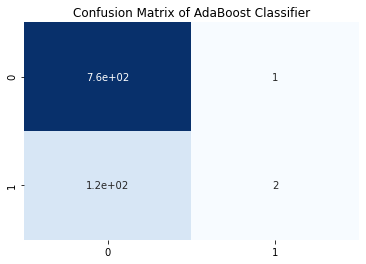

In [93]:
#lets plot confusion matrix for AdaBoost Classifier
cm=confusion_matrix(y_test,predabc)
sns.heatmap(cm,annot=True,cbar=False,cmap='Blues')

plt.title('Confusion Matrix of AdaBoost Classifier')
plt.show()

In [95]:
#AUV ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

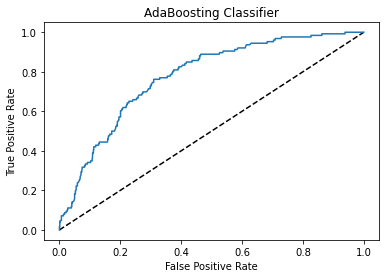

0.5072803399575053


In [104]:
y_pred_prob=abc.predict_proba(x_test)[:,1]
fbr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fbr,tpr,label='AdaBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoosting Classifier')
plt.show()


auc_score=roc_auc_score(y_test,predabc)
print(auc_score)

In [105]:
#saving this model
import joblib

In [106]:
joblib.dump(abc,'agriculture')

['agriculture']